In [1]:
import galsim
import pyccl as ccl

import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import Uniform, Beta

In [2]:
# Vanilla LDCM
cosmo = ccl.cosmology.CosmologyVanillaLCDM()

# Uniform redshift distribution on [0.5, 1.5]
z = np.linspace(0.5, 1.5, 512)
n = np.ones(z.shape)

# Weak lensing tracer with the above cosmology and redshift
lensing_tracer = ccl.WeakLensingTracer(cosmo, dndz=(z, n)) #CCL automatically normalizes dNdz

# Cosmic shear angular power spectrum
ell = np.arange(2, 10000)
cls = ccl.angular_cl(cosmo, lensing_tracer, lensing_tracer, ell) # Cosmic shear

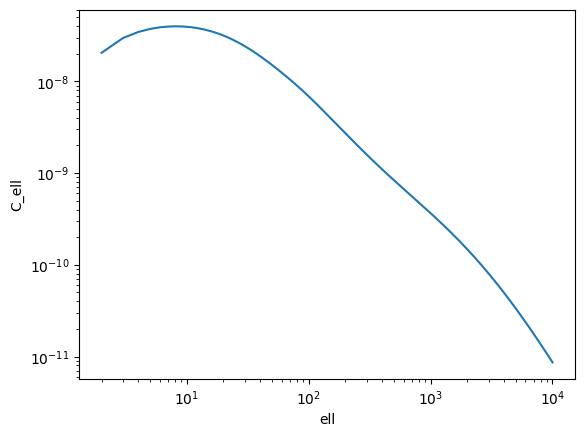

In [3]:
# Plot cosmic shear angular power spectrum
_ = plt.plot(ell, cls)
_ = plt.xlabel('ell')
_ = plt.ylabel('C_ell')
_ = plt.yscale('log')
_ = plt.xscale('log')

shear1: min = -0.013 mean = 0.0 max = 0.013
shear2: min = -0.013 mean = -0.0 max = 0.012
convergence: min = -0.017 mean = -0.0 max = 0.018


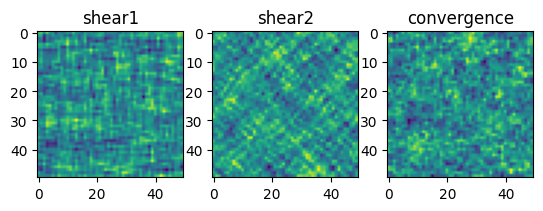

In [4]:
# Use ngrid tiles over grid_size degrees
grid_size = 0.5
ngrid = 50

# Lookup table
table = galsim.LookupTable(x = ell, f = cls)

# Power spectrum
my_ps = galsim.PowerSpectrum(table, units = galsim.radians)

# Get reduced shear and convergence
g1, g2, kappa = my_ps.buildGrid(grid_spacing=grid_size/ngrid, ngrid=ngrid,
                                get_convergence=True, units = galsim.radians)

# Compute shear using reduced shear and convergence
gamma1 = g1 * (1 - kappa)
gamma2 = g2 * (1 - kappa)

# Print summary statistics
print('shear1:', f'min = {gamma1.min().round(3)}', f'mean = {gamma1.mean().round(3)}', f'max = {gamma1.max().round(3)}')
print('shear2:', f'min = {gamma2.min().round(3)}', f'mean = {gamma2.mean().round(3)}', f'max = {gamma2.max().round(3)}')
print('convergence:', f'min = {kappa.min().round(3)}', f'mean = {kappa.mean().round(3)}', f'max = {kappa.max().round(3)}')

# Plot shear and convergence maps
fig, ax = plt.subplots(nrows=1,ncols=3)
_ = ax[0].imshow(gamma1)
_ = ax[0].set_title('shear1')
_ = ax[1].imshow(g2)
_ = ax[1].set_title('shear2')
_ = ax[2].imshow(kappa)
_ = ax[2].set_title('convergence')